<a href="https://colab.research.google.com/github/good0neighbour/ESTCampAI/blob/main/Deeplearning/02_%EC%86%90%EA%B8%80%EC%94%A8_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EB%A5%98(%EB%8B%A4%EC%A4%91_%EB%B6%84%EB%A5%98).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 목표
- 손글씨 데이터를 0~9까지 숫자 중에 어떤 숫자를 썼는지 분류하는 딥러닝 모델 구현

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/ESTCampAI/Deeplearning

/content/drive/MyDrive/ESTCampAI/Deeplearning


In [ ]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.datasets import mnist # 손글씨 데이터 셋 불러오기

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

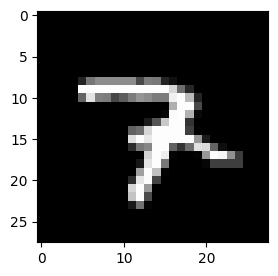

In [ ]:
# X 데이터 이미지 출력해서 확인.
plt.figure(figsize = (3, 3))
plt.imshow(X_train[518], cmap = 'gray')
plt.show()
# (28, 28)
# 픽셀에 대한 정보가 들어있음 0~255
# 0 : 검정색, 255 : 흰색

In [ ]:
# 실제 답 출력해보기
y_train[518]

np.uint8(7)

In [ ]:
# y데이터 확인
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### MLP 모델링

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten
# Flatten : 2차원형태 (60000, 28, 28) -> (28, 28) 사진데이터를 1차원으로 출력해주는 클래스

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [ ]:
# 1. 모델 설계
# 1-1 뼈대
model = Sequential()

# 1-2 입력층 -> 입력 모양을 잡는다
model.add(InputLayer(shape = (28, 28))) # 데이터셋의 한 개 모양

# 1-3 은닉층(중간층)
model.add(Flatten()) # 다차원을 1차원으로 변환(Dense에서 원하는 입력 차원)
model.add(Dense(units = 32, activation = 'sigmoid'))
model.add(Dense(units = 64, activation = 'sigmoid'))
model.add(Dense(units = 32, activation = 'sigmoid'))

# 1-4 출력층 -> 출력 모양을 잡는 역할
# 0~9 사이의 값이 나올 수 있으므로 여기에 모양을 맞춰줘야 함
model.add(Dense(10, activation = "softmax"))
# softmax : 클래스 각각의 확률값을 반환(모든 확률값의 합은 1)

In [ ]:
# 2. 학습 방법 설정
model.compile(
    optimizer = "Adam",
    metrics = ["accuracy"],
    loss = 'sparse_categorical_crossentropy'
)
# 이진 분류 : binary_crossentropy
# 다중 분류 : sparse_categorical_crossentropy -> 정수의 형태로 class가 나타남
# 다중 분류 : categorical_crossentropy -> 결과가 원핫인코딩의 결과처럼 나타날 때

In [ ]:
h = model.fit(X_train, y_train, validation_split = 0.25, epochs = 20)

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.4940 - loss: 1.6532 - val_accuracy: 0.8004 - val_loss: 0.6734
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7993 - loss: 0.6575 - val_accuracy: 0.8397 - val_loss: 0.5336
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8407 - loss: 0.5253 - val_accuracy: 0.8427 - val_loss: 0.4931
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8463 - loss: 0.4962 - val_accuracy: 0.8681 - val_loss: 0.4444
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8545 - loss: 0.4711 - val_accuracy: 0.8616 - val_loss: 0.4397
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8737 - loss: 0.4173 - val_accuracy: 0.8811 - val_loss: 0.3898
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8827 - loss: 0.3793 - val_accuracy: 0.8897 - val_loss: 0.3634
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8846 - loss: 0.3792 

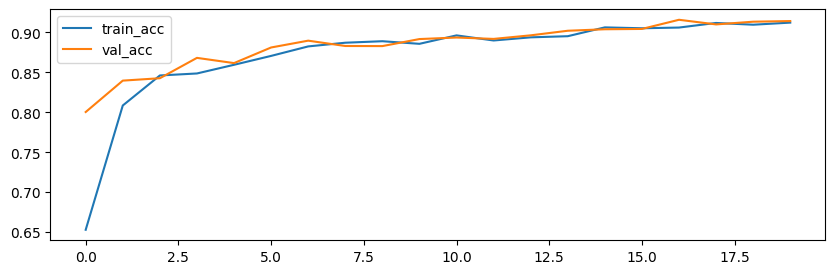

In [ ]:
plt.figure(figsize = (10, 3))
plt.plot(h.history['accuracy'], label = 'train_acc')
plt.plot(h.history['val_accuracy'], label = 'val_acc')
plt.legend()
plt.show()

In [ ]:
# 1. 모델 설계
# 1-1 뼈대
model = Sequential()

# 1-2 입력층 -> 입력 모양을 잡는다
model.add(InputLayer(shape = (28, 28))) # 데이터셋의 한 개 모양

# 1-3 은닉층(중간층)
model.add(Flatten()) # 다차원을 1차원으로 변환(Dense에서 원하는 입력 차원)
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))

# 1-4 출력층 -> 출력 모양을 잡는 역할
# 0~9 사이의 값이 나올 수 있으므로 여기에 모양을 맞춰줘야 함
model.add(Dense(10, activation = "softmax"))
# softmax : 클래스 각각의 확률값을 반환(모든 확률값의 합은 1)

In [ ]:
# 2. 학습 방법 설정
model.compile(
    optimizer = "Adam",
    metrics = ["accuracy"],
    loss = 'sparse_categorical_crossentropy'
)
# 이진 분류 : binary_crossentropy
# 다중 분류 : sparse_categorical_crossentropy -> 정수의 형태로 class가 나타남
# 다중 분류 : categorical_crossentropy -> 결과가 원핫인코딩의 결과처럼 나타날 때

In [ ]:
h = model.fit(X_train, y_train, validation_split = 0.25, epochs = 20)

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.4940 - loss: 1.6532 - val_accuracy: 0.8004 - val_loss: 0.6734
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7993 - loss: 0.6575 - val_accuracy: 0.8397 - val_loss: 0.5336
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8407 - loss: 0.5253 - val_accuracy: 0.8427 - val_loss: 0.4931
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8463 - loss: 0.4962 - val_accuracy: 0.8681 - val_loss: 0.4444
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8545 - loss: 0.4711 - val_accuracy: 0.8616 - val_loss: 0.4397
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8737 - loss: 0.4173 - val_accuracy: 0.8811 - val_loss: 0.3898
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8827 - loss: 0.3793 - val_accuracy: 0.8897 - val_loss: 0.3634
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8846 - loss: 0.3792 

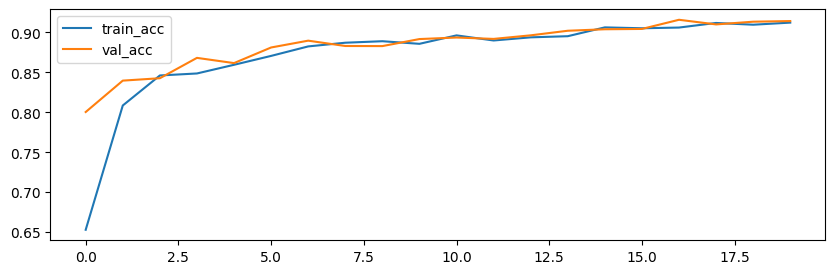

In [ ]:
plt.figure(figsize = (10, 3))
plt.plot(h.history['accuracy'], label = 'train_acc')
plt.plot(h.history['val_accuracy'], label = 'val_acc')
plt.legend()
plt.show()

### Callback 함수
- 특정 이벤트가 발생했을 때, 호출되는 함수
- 딥러닝 계에서는 유용한 도구
- 모델을 중간에 저장, 조기 학습 중단

In [ ]:
# 학습된 모델 저장
model.save("./data/hand_model.keras")

In [ ]:
# 저장된 모델 불러오기
from tensorflow.keras.models import load_model # 텐서플로우 모델 불러오는 도구

In [ ]:
loaded_model = load_model("./data/hand_model.keras")

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
# 잘 불러와 졌는지, 예측을 수행해보자.
loaded_model.predict(X_test)[0].argmax() # 최대값을 가지는 인덱스 번호를 반환하는 함수

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


np.int64(8)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# ModelCheckpoint : 모델 중간에 저장하는 도구
# EarlyStopping : 조기 학습 중단 도구

In [ ]:
# 체크포인트 전용 포메팅 방식 지정하기
model_path = "./data/hand_model-{epoch:03d}-{val_accuracy:.3f}.keras"

In [ ]:
# 체크포인트 생성(초기화)
model_checkpoint_callback = ModelCheckpoint(
    filepath = model_path, # 경로 및 파일명
    monitor = "val_accuracy", # 나아진 것을 판단하기 위한 기준
    save_best_only = True, # 나아진 결과만 저장
    verbose = 1 # 학습 결과가 출력될 때, 저장한 내역도 같이 출력해라
)

In [ ]:
# 얼리스타핑 생성(초기화)
early_stop_callback = EarlyStopping(
    monitor = "val_accuracy", # 조기학습 중단에 사용할 기준
    patience = 5 # 전보다 나아지지 않아도 실행할 횟수
)

In [ ]:
# 1. 모델 설계
# 1-1 뼈대
model3 = Sequential()

# 1-2 입력층 -> 입력 모양을 잡는다
model3.add(InputLayer(shape = (28, 28)))

# 1-3 은닉층(중간층)
model3.add(Flatten())
model3.add(Dense(units = 32, activation = 'relu'))
model3.add(Dense(units = 64, activation = 'relu'))
model3.add(Dense(units = 128, activation = 'relu'))
model3.add(Dense(units = 64, activation = 'relu'))
model3.add(Dense(units = 32, activation = 'relu'))

# 1-4 출력층
model3.add(Dense(10, activation = "softmax"))

# 2. 학습 방법 설정
model3.compile(optimizer = "Adam", metrics = ["accuracy"], loss = 'sparse_categorical_crossentropy')

# 3. 학습
h = model3.fit(
    X_train, y_train,
    validation_data = (X_test, y_test), # 검증 시에 분할(split)외에도, 직접적으로 데이터셋 지정 가능.
    epochs = 100,
    callbacks = [model_checkpoint_callback, early_stop_callback] # 콜백 함수 지정
)

Epoch 1/100
1868/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7051 - loss: 1.3348
Epoch 1: val_accuracy improved from -inf to 0.91400, saving model to ./data/hand_model-001-0.914.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7056 - loss: 1.3317 - val_accuracy: 0.9140 - val_loss: 0.2915
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9274 - loss: 0.2488
Epoch 2: val_accuracy improved from 0.91400 to 0.93790, saving model to ./data/hand_model-002-0.938.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9274 - loss: 0.2488 - val_accuracy: 0.9379 - val_loss: 0.2208
Epoch 3/100
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9429 - loss: 0.1968
Epoch 3: val_accuracy improved from 0.93790 to 0.94000, saving model to ./data/hand_model-003-0.940.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9429 - loss: 0.1968 - val_accuracy: 0.9400 - val_loss: 0.2212
Epoch 4/100
1861/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - a

In [ ]:
# 학습 결과가 좋은 모델 불러오기
loaded_model2 = load_model("./data/hand_model-010-0.965.keras")

In [ ]:
loaded_model2.predict(X_test)[0].argmax()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


np.int64(7)

### 직접 손글씨를 써서, 데이터로 입력하고 예측 시키기